In [1]:
import numpy as np
from skimage import io, filters, exposure
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('ggplot')
%matplotlib widget

def show_image(ax, image, title, cmap=None):
    ax.imshow(image, cmap=cmap)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(title)

def norm(image):
    return np.around(255 * (image - image.min(axis=(0, 1))) / (image.max(axis=(0, 1)) - image.min(axis=(0, 1)))).astype(np.uint8)

In [2]:
# Read in the image
path = "./Skye.tiff"
image = io.imread(path)
print("Image dimensions:", image.shape)
print("Image type:", image.dtype)

Image dimensions: (3024, 3024, 3)
Image type: uint8


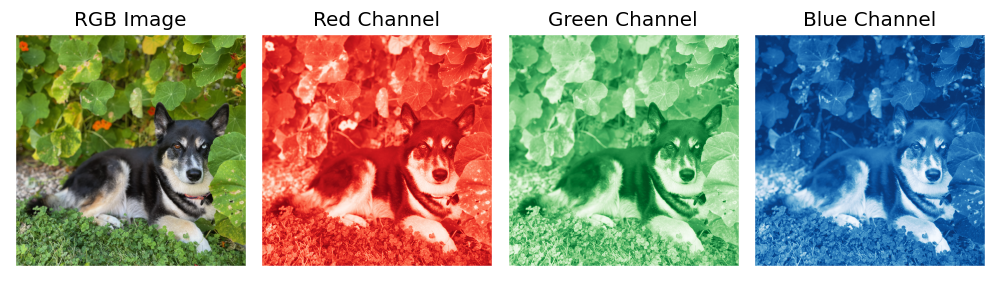

In [3]:
# Plot the image and the channels
plt.close(1)
fig = plt.figure(num=1, figsize=(10, 3), dpi=100)
ax = fig.add_subplot(141)
show_image(ax, image, 'RGB Image')
ax = fig.add_subplot(142)
show_image(ax, image[:,:,0], 'Red Channel', cmap='Reds_r')
ax = fig.add_subplot(143)
show_image(ax, image[:,:,1], 'Green Channel', cmap='Greens_r')
ax = fig.add_subplot(144)
show_image(ax, image[:,:,2], 'Blue Channel', cmap='Blues_r')
plt.tight_layout()
plt.show()

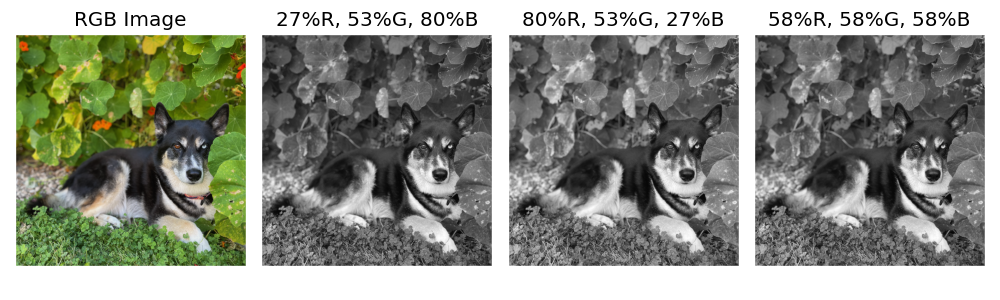

In [4]:
# Plot the image and the channels
plt.close(2)
fig = plt.figure(num=2, figsize=(10, 3), dpi=100)
ax = fig.add_subplot(141)
show_image(ax, image, 'RGB Image')

ax = fig.add_subplot(142)
w = (w:=np.array([0.1, 0.2, 0.3])) / np.linalg.norm(w)
show_image(ax, image.dot(w), f"{w[0]*100:.0f}%R, {w[1]*100:.0f}%G, {w[2]*100:.0f}%B", cmap='gray')

ax = fig.add_subplot(143)
w = (w:=np.array([0.3, 0.2, 0.1])) / np.linalg.norm(w)
show_image(ax, image.dot(w), f"{w[0]*100:.0f}%R, {w[1]*100:.0f}%G, {w[2]*100:.0f}%B", cmap='gray')

ax = fig.add_subplot(144)
w = (w:=np.array([0.3, 0.3, 0.3])) / np.linalg.norm(w)
show_image(ax, image.dot(w), f"{w[0]*100:.0f}%R, {w[1]*100:.0f}%G, {w[2]*100:.0f}%B", cmap='gray')
plt.tight_layout()
plt.show()




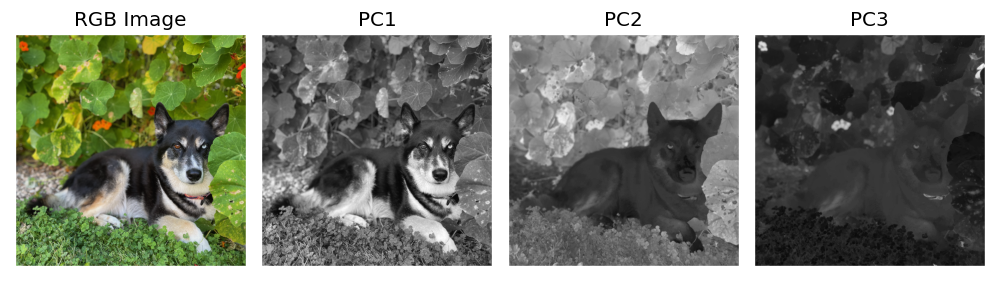

In [8]:
# Perform PCA on the image to get the principal greyscale components
pca = PCA(n_components=3)
pca.fit(image.reshape(-1, 3))
components = pca.components_

# Transform the image to the principal components
image_pca = pca.transform(image.reshape(-1, 3)).reshape(image.shape)
# Convert back to uint8
image_pca = norm(image_pca)

# Plot the principal components
plt.close(3)
fig = plt.figure(num=3, figsize=(10, 3), dpi=100)
ax = fig.add_subplot(141)
show_image(ax, image, 'RGB Image')
ax = fig.add_subplot(142)
show_image(ax, image_pca[:, :, 0], 'PC1', cmap='gray')
ax = fig.add_subplot(143)
show_image(ax, image_pca[:, :, 1], 'PC2', cmap='gray')
ax = fig.add_subplot(144)
show_image(ax, image_pca[:, :, 2], 'PC3', cmap='gray')
plt.tight_layout()
plt.show()

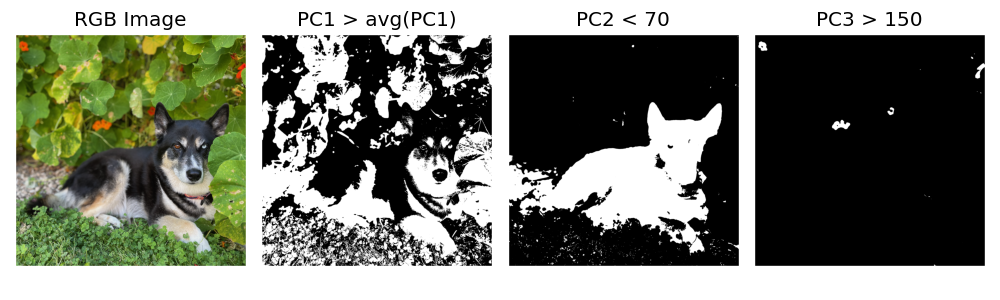

In [6]:
# Illustrate using the PCA for identifying objects
plt.close(4)
fig = plt.figure(num=4, figsize=(10, 3), dpi=100)
ax = fig.add_subplot(141)
show_image(ax, image, 'RGB Image')
ax = fig.add_subplot(142)
show_image(ax, image_pca[:, :, 0] > image_pca[:, :, 0].mean(), 'PC1 > avg(PC1)', cmap='gray')
ax = fig.add_subplot(143)
show_image(ax, image_pca[:, :, 1] < 70, 'PC2 < 70', cmap='gray')
ax = fig.add_subplot(144)
show_image(ax, image_pca[:, :, 2] > 150, 'PC3 > 150', cmap='gray')
plt.tight_layout()
plt.show()

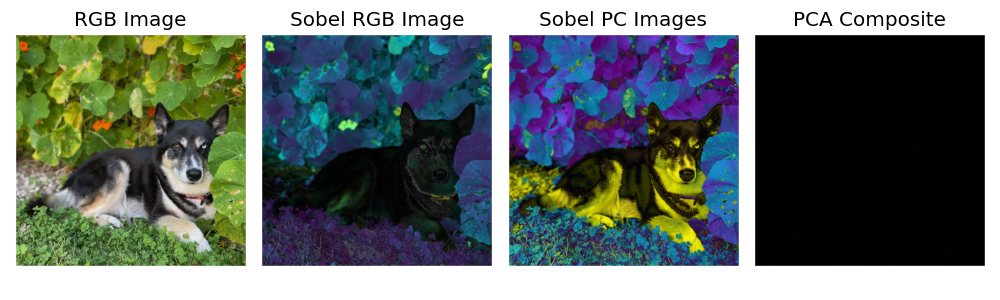

In [9]:
# Illustrate edge detection
sobel_image = filters.sobel(image)
sobel_image = norm(sobel_image)
sobel_pca = filters.sobel(image_pca)
sobel_pca = norm(sobel_pca)
new_image = image_pca.copy()
new_image = norm(new_image)

plt.close(4)
fig = plt.figure(num=4, figsize=(10, 3), dpi=100)
ax = fig.add_subplot(141)
show_image(ax, image, 'RGB Image')
ax = fig.add_subplot(142)
show_image(ax, sobel_image, 'Sobel RGB Image', cmap='gray')
ax = fig.add_subplot(143)
show_image(ax, sobel_pca, 'Sobel PC Images', cmap='gray')
ax = fig.add_subplot(144)
show_image(ax, new_image, 'PCA Composite', cmap=None)
plt.tight_layout()
plt.show()